In [ ]:
import random
import pandas as pd
from datetime import datetime
import csv

# Product class
class Product:
    def __init__(self, title, description, price, sku):
        self.title = title
        self.description = description
        self.price = price
        self.sku = sku  # Unique identifier for the product

    def __str__(self):
        return f"{self.description} {self.title} (SKU: {self.sku}) - ${self.price:.2f}"

# Inventory class
class Inventory:
    MAX_SIZE = 200000  # Constant to control the size of the inventory

    def __init__(self):
        self.products = []

    def generate_product(self, sku):
        adjectives = ["Smart", "Wireless", "Portable", "High-Tech", "Touchscreen", "Bluetooth", "High-Speed"]
        product_types = ["Fitness Tracker", "Smart Scale", "Heart Rate Monitor", "Gym Equipment", "Activity Monitor", "Music Player", "Treadmill", "Stairmaster"]
        title = random.choice(product_types)
        description = random.choice(adjectives)
        price = round(random.uniform(10.0, 500.0), 2)
        gadget = Product(title, description, price, sku)
        self.products.append(gadget)

    def generate_inventory(self, size):
        for sku in range(1, min(size, self.MAX_SIZE) + 1):
            self.generate_product(sku)

# Basket class
class Basket:
    def __init__(self):
        self.items = []

    def add_to_basket(self, product):
        self.items.append(product)

    def total_price(self):
        return sum(product.price for product in self.items)

# Order class
class Order:
    def __init__(self, order_id, basket):
        self.order_id = order_id
        self.products = basket.items
        self.date = datetime.now()

    def total_price(self):
        return sum(product.price for product in self.products)

# Customer class
class Customer:
    def __init__(self, customer_id, name):
        self.customer_id = customer_id
        self.name = name
        self.basket = Basket()
        self.orders = []

    def create_order(self, order_id):
        order = Order(order_id, self.basket)
        self.orders.append(order)
        return order

    def add_to_basket(self, product):
        self.basket.add_to_basket(product)

# Store class
class Store:
    def __init__(self, store_id):
        self.store_id = store_id
        self.customers = {}
        self.total_sales = 0.0  # Track total sales value

    def visit_customer(self, customer_id, customer_name, order_id, available_products):
        if customer_id not in self.customers:
            self.customers[customer_id] = Customer(customer_id, customer_name)
        customer = self.customers[customer_id]

        # Randomly determine how many products the customer will add (1-10)
        num_items = random.randint(1, 10)  # Adjust the range as needed to create more large baskets
        for _ in range(num_items):
            product = random.choice(available_products)
            customer.add_to_basket(product)

        # Create an order
        order = customer.create_order(order_id)
        self.total_sales += order.total_price()  # Add to store's total sales
        return order

# Corporation class
class Corporation:
    def __init__(self):
        self.stores = {}
        self.corporate_sales = 0.0

    def add_store(self, store_id):
        if store_id not in self.stores:
            self.stores[store_id] = Store(store_id)

    def generate_sales_data(self, num_stores, num_customers_per_store, available_products, customer_names):
        sales_data = []
        for store_id in range(1, num_stores + 1):
            self.add_store(store_id)
            store = self.stores[store_id]
            for customer_id in range(1, num_customers_per_store + 1):
                customer_name = random.choice(customer_names)
                order_id = f"ORD-{store_id}-{customer_id}"
                order = store.visit_customer(customer_id, customer_name, order_id, available_products)
                for product in order.products:
                    sales_data.append([
                        order.date.strftime("%Y-%m-%d"),
                        order.date.strftime("%H:%M:%S"),
                        store_id,
                        customer_id,
                        customer_name,
                        order_id,
                        product.title,
                        product.description,
                        product.price
                    ])
            self.corporate_sales += store.total_sales
        return pd.DataFrame(sales_data, columns=[
            'Date', 'Time', 'StoreID', 'CustomerID', 'CustomerName', 'OrderID',
            'ProductName', 'ProductDescription', 'ProductPrice'
        ])

    def write_sales_to_csv(self, sales_data, filename='sales_data.csv'):
        sales_data.to_csv(filename, index=False)
        print(f"Sales data written to {filename}")
        print(f"Total Corporate Sales: ${self.corporate_sales:.2f}")

# Main execution
if __name__ == "__main__":
    customer_names = ["John Doe", "Jane Smith", "Michael Johnson", "Emily Davis", "David Wilson",
                      "Olivia Taylor", "James Anderson", "Sophia Thomas", "Benjamin Jackson", "Ava White"]
    inventory = Inventory()
    inventory.generate_inventory(100)
    my_corporation = Corporation()
    sales_data = my_corporation.generate_sales_data(
        num_stores=20,
        num_customers_per_store=25,
        available_products=inventory.products,
        customer_names=customer_names
    )
    my_corporation.write_sales_to_csv(sales_data)


Sales data written to sales_data.csv
Total Corporate Sales: $684664.10


In [ ]:
# prompt: generate the most prevalent products, in customer baskets

most_prevalent_products = sales_data['ProductName'].value_counts().head(10)
print(most_prevalent_products)

ProductName
Music Player          487
Stairmaster           437
Gym Equipment         370
Smart Scale           365
Fitness Tracker       328
Heart Rate Monitor    292
Treadmill             275
Activity Monitor      260
Name: count, dtype: int64


In [ ]:
#The frequency by which customers were large buyers, or filled up large baskets. Large baskets in this case were 5 different orders or more.

large_baskets = sales_data.groupby(['OrderID']).size()
large_basket_frequency = large_baskets[large_baskets >= 5].count()
print(f"Number of large-basket orders: {large_basket_frequency}")

Number of large-basket orders: 308


In [ ]:
#Which stores contained the large-basket buyers, and by how much

stores_large_baskets = sales_data.groupby(['StoreID', 'OrderID']).size()
stores_large_basket_counts = stores_large_baskets[stores_large_baskets >= 5].groupby('StoreID').count()
print(stores_large_basket_counts)


StoreID
1     15
2     16
3     13
4     17
5     12
6     13
7     15
8     13
9     15
10    17
11    12
12    16
13    17
14    19
15    14
16    15
17    20
18    20
19    16
20    13
dtype: int64


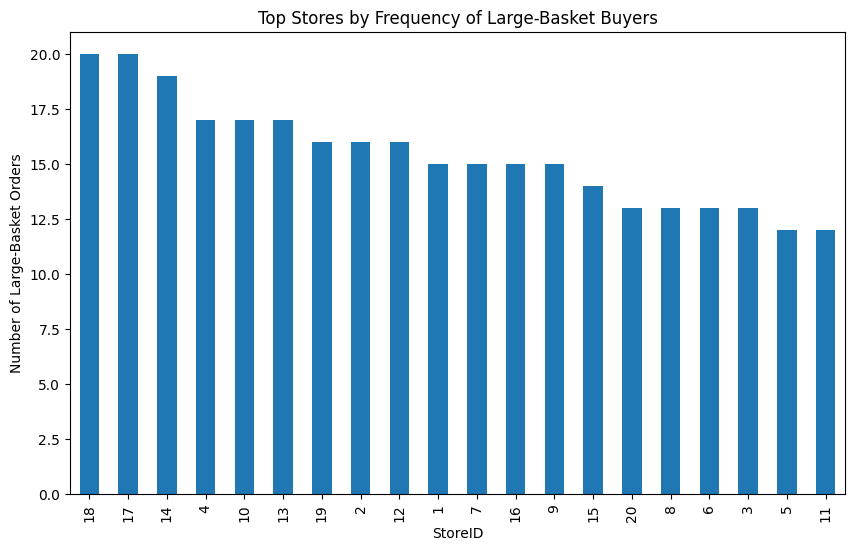

In [ ]:
#A visualization that ranks the top, large-basket customer stores, by frequency

import matplotlib.pyplot as plt

stores_large_basket_counts.sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 6), title='Top Stores by Frequency of Large-Basket Buyers'
)
plt.xlabel('StoreID')
plt.ylabel('Number of Large-Basket Orders')
plt.show()


In [ ]:
#A top-n list of products, which were typical to customers in this demographic

large_basket_orders = large_baskets[large_baskets >= 5].index
products_in_large_baskets = sales_data[sales_data['OrderID'].isin(large_basket_orders)]['ProductName']
top_products_large_baskets = products_in_large_baskets.value_counts().head(10)
print(top_products_large_baskets)


ProductName
Music Player          401
Stairmaster           367
Gym Equipment         306
Smart Scale           304
Fitness Tracker       270
Treadmill             242
Heart Rate Monitor    239
Activity Monitor      215
Name: count, dtype: int64


In [ ]:
#what is the categoric makeup of their baskets, on average?

categorical_makeup = sales_data[sales_data['OrderID'].isin(large_basket_orders)]['ProductDescription'].value_counts(normalize=True)
print(categorical_makeup)


ProductDescription
Smart          0.204352
Touchscreen    0.146331
High-Speed     0.143345
Bluetooth      0.137799
High-Tech      0.129266
Portable       0.123720
Wireless       0.115188
Name: proportion, dtype: float64


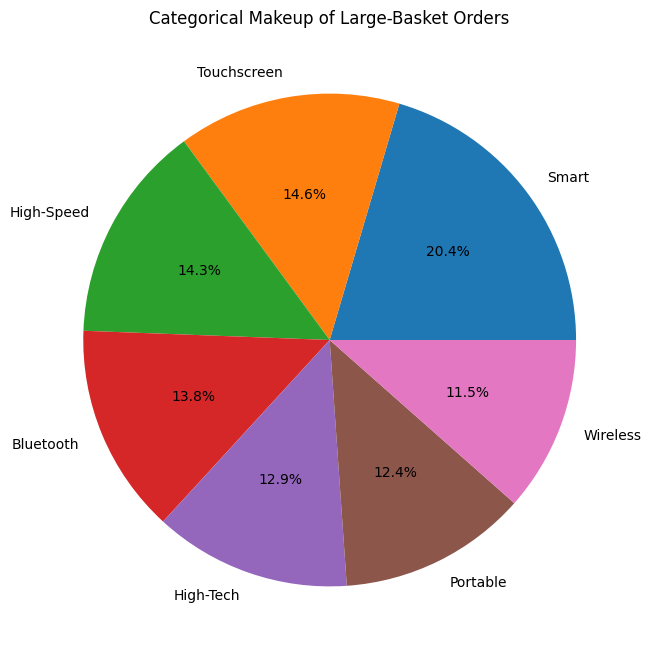

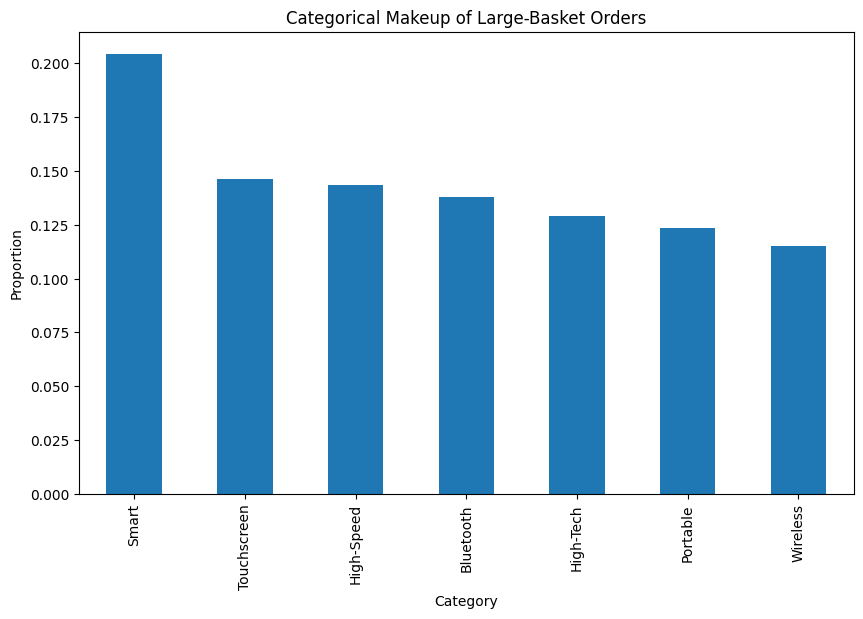

In [ ]:
#Visualization for item 6

#Pie Chart
categorical_makeup.plot(
    kind='pie', figsize=(8, 8), autopct='%1.1f%%', title='Categorical Makeup of Large-Basket Orders'
)
plt.ylabel('')
plt.show()

#Bar Chart
categorical_makeup.sort_values(ascending=False).plot(
    kind='bar', figsize=(10, 6), title='Categorical Makeup of Large-Basket Orders'
)
plt.xlabel('Category')
plt.ylabel('Proportion')
plt.show()
